# BUSINESS PROBLEM

# Analysis Fraud Company

Check Financial fraud transations.

# What is the business model?

Analysis Fraud Company is a company specialized in the detection of fraud in financial transactions made through mobile devices. The company has a service called "Blocker Fraud" which guarantees the blocking of fraudulent transactions.

# What is the business problem the company is facing?

Analysis Fraud Company is expanding and try to reach new customers as soon as possible, it has adopted a very aggressive strategy. The strategy works as follows:

The company will receive 25% of each transaction value that was correctly detected as fraud.

The company will receive 5% of each transaction value that was detected as a fraud despite being legitimate.

The company will return 100% of each transaction value that was detected as legitimate despite being a fraud.

In other words, the company takes the risk of failing to detect fraud and earns money when correctly detecting fraud.

For the client, it is an excellent deal to hire Blocker Fraud Company. Although the fee charged is very high when fraud is correctly detected (25%), the hiring company reduces its costs of detecting fraudulent transactions and errors in the anti-fraud service are under the hired company responsibility.

For the Analysis of Fraud company, it will attract many customers with the guaranteed return in the event of a failure to detect customer fraud. Besides, Analysis of Fraud only depends on the precision and accuracy of its model: the more accurate the prediction, the higher the company's revenue. However, in the case of low accuracy, the company could have a high loss.

# PROBLEM UNDERSTANDING

What is the business solution that this project has to deliver? As a data science consultant, you have to create a highly precise and accurate model for detecting fraud in mobile transactions.

At the end of your consultancy, you need to provide the CEO of Analysis Fraud Company a model in production that will be accessed via API, meaning that clients will send their transactions via API for your model to classify as fraudulent or legitimate.

In addition, you will need to submit a report with the model's performance and results about the profit and loss that the company will make using the model you created. Your report should contain the answers to the following questions:

   * What is the precision and accuracy of the model?
   
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   
   * What is the expected loss by the company for the cases where the model fails to detect fraud?
   
   * What is the expected profit for the Analysis Fraud Company if it uses the model for all mobile transactions?


Source data set: https://www.kaggle.com/ntnu-testimon/paysim1

| Feature        | Description                                                                                                                                                                                                                                                                                           |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| step           | maps a unit of time in the real world\. In this case 1 step is 1 hour of time\. Total steps 744 \(30 days simulation\)\.                                                                                                                                                                              |
| type           | Transaction type \(CASH\-IN, CASH\-OUT, DEBIT, PAYMENT and TRANSFER\)                                                                                                                                                                                                                                 |
| amount         | amount of the transaction in local currency                                                                                                                                                                                                                                                           |
| nameOrig       | customer who started the transaction                                                                                                                                                                                                                                                                  |
| oldbalanceOrg  | initial balance before the transaction                                                                                                                                                                                                                                                                |
| newbalanceOrig | new balance after the transaction                                                                                                                                                                                                                                                                     |
| nameDest       | customer who is the recipient of the transaction                                                                                                                                                                                                                                                      |
| oldbalanceDest | initial balance recipient before the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                   |
| newbalanceDest | new balance recipient after the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                        |
| isFraud        | This is the transactions made by the fraudulent agents inside the simulation\. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system |
| isFlaggedFraud | The business model aims to control massive transfers from one account to another and flags illegal attempts\. An illegal attempt in this dataset is an attempt to transfer more than 200K in a single transaction 

## IOT Method Solution Strategy

In [1]:
cd ..

/home/ehgeraldo/repos/Fraud_Detection


In [2]:
cd images

/home/ehgeraldo/repos/Fraud_Detection/images


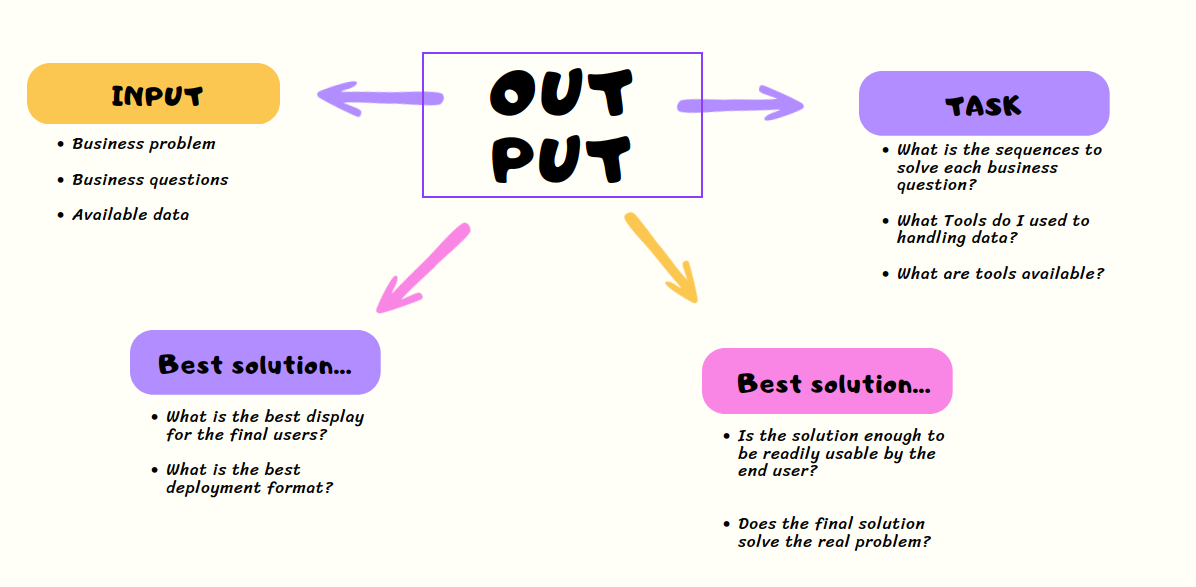

In [3]:
from IPython.display       import Image
Image( 'IOT_Method_Solution.png', width=1000 )

# SOLUTION STRATEGY


### INPUT

   * Business problem: correctly detect fraudulent transactions.
   * Business questions: described in the preceding section
   * Available data: dataset with information from mobile transactions.
        
        
### OUTPUT

   * An API to classify clients transactions.
   * A dashboard with reporting information about the following business questions:

   * What is the precision and accuracy of the model?
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   * What is the expected loss by the company for the cases where the model fails to detect fraud
   * What is the expected profit for the Blocker Fraud Company if it uses the model for all mobile transactions?
    

### TASKs
Create an API to classify clients transactions.

   * Create a machine learning classification model
   * Create an API to respond to clients requests
   * Host API on a cloud service

# PROJECT SOLUTION CYCLE

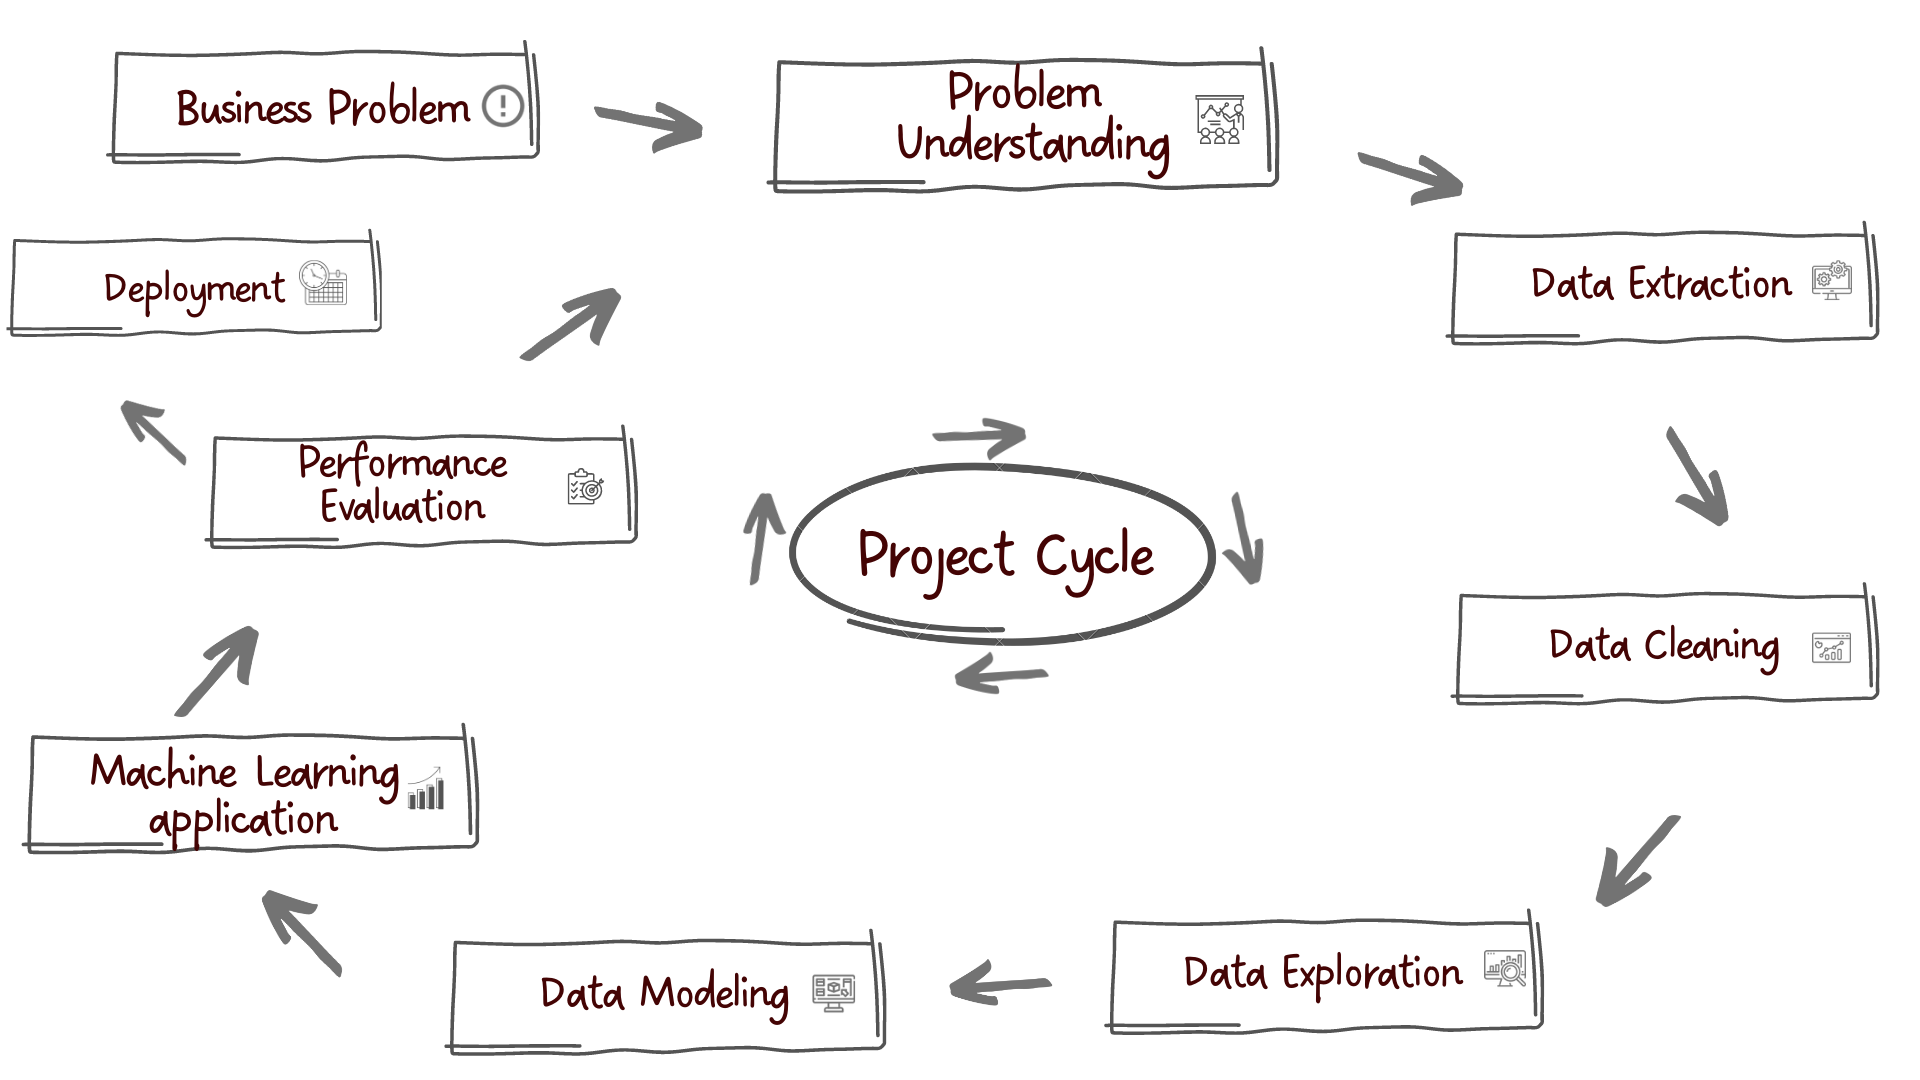

In [4]:
from IPython.display       import Image
Image( 'Project_Cicles.png', width=1000 )

# HYPOTHESIS MIND MAP

In [5]:
pwd

'/home/ehgeraldo/repos/Fraud_Detection/images'

In [6]:
ls -l

total 468
-rw-rw-r-- 1 ehgeraldo ehgeraldo 141563 jun  5 20:26 Hypothesis_Map.png
-rw-rw-r-- 1 ehgeraldo ehgeraldo 115818 jun  1 23:19 IOT_Method_Solution.png
-rw-rw-r-- 1 ehgeraldo ehgeraldo 215310 jun  3 10:59 Project_Cicles.png


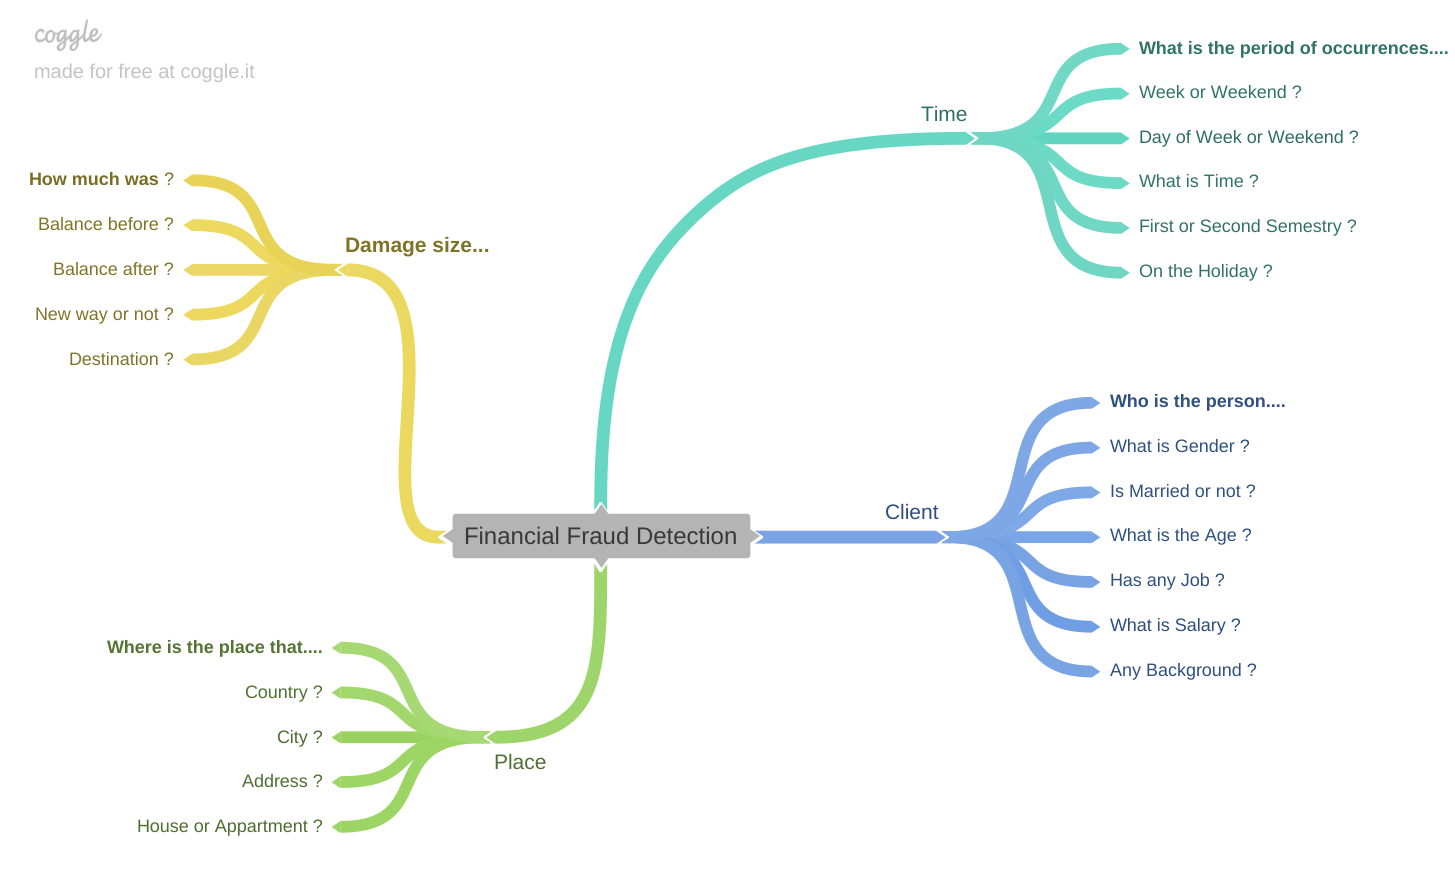

In [7]:
from IPython.display       import Image
Image( 'Hypothesis_Map.png', width=1000 )

# 0.0 Imports

In [1]:
# data manipulation
import pandas  as  pd
import numpy   as  np

# EDA
import seaborn as  sns
import math

# utilities
import inflection
from IPython.core.display import HTML
from IPython.display      import Image

# PySpark for data manipulation
from   plotly.subplots             import make_subplots
from   pyspark.sql                 import SparkSession
from   pyspark.ml.classification   import LogisticRegression
from   pyspark.ml.feature          import VectorAssembler
from   pyspark.ml.evaluation       import MultilabelClassificationEvaluator
from   pyspark.sql.types           import StructType, StructField
from   pyspark.sql.types           import StringType, ShortType, ByteType, DoubleType, DecimalType
from   pyspark.sql.functions       import col, when, abs, lit
from   pyspark.ml.feature          import RobustScaler, RobustScalerModel
from   pyspark.ml.feature          import StandardScaler, StandardScalerModel
from   pyspark.ml.feature          import MinMaxScaler, MinMaxScalerModel
from   pyspark.ml.feature          import UnivariateFeatureSelector
from   pyspark.ml.stat             import ChiSquareTest
from   pyspark.ml.classification   import RandomForestClassifier
from   pyspark.ml.classification   import GBTClassifier, GBTClassificationModel
from   pyspark.sql                 import functions                               as F

# Helper Function

In [2]:
# +++++++++
# Graphic
# +++++++++
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()


# ++++++++++++
# Data Types
# ++++++++++++
def check_dataframe( dataframe, sample_size = 3 ):
    '''
    Print number of NAs, percentage of NA to the given column,
    number of unique values, data types, dataframe shape and 
    return a random sample of dataframe'''
    
    # create dictionary with descriptive information
    dict_data = {'Num NAs':     dataframe.isna().sum(),
                 'Percent NAs': dataframe.isna().mean(),
                 'Num unique':  dataframe.nunique(),
                 'Data Type':   dataframe.dtypes }
  
    # print descriptive data
    print( pd.DataFrame( dict_data ), '\n' )
    # print dataframe shape
    print( f'Dataframe shape is {dataframe.shape}', '\n' )  
    
    
    return dataframe.sample( sample_size )


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Loading Data

In [3]:
cd ..

/home/ehgeraldo/repos/Fraud_Detection


In [4]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Fraud_Detection/data/synth_composite.csv', low_memory=False)

In [5]:
df_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data Description

In [6]:
df1 = df_raw.copy()

# Data dimensions

In [7]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 6362620
Number of Columns: 11


# Rename Columns

In [8]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
cols_old = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']

snakecase = lambda x: inflection.underscore(x)

cols_news = list(map(snakecase, cols_old))

df1.columns = cols_news

In [10]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data types

In [11]:
check_dataframe( df1 )

                  Num NAs  Percent NAs  Num unique Data Type
step                    0          0.0         743     int64
type                    0          0.0           5    object
amount                  0          0.0     6362038   float64
name_orig               0          0.0     6353335    object
oldbalance_org          0          0.0     6362547   float64
newbalance_orig         0          0.0     2275917   float64
name_dest               0          0.0     2727854    object
oldbalance_dest         0          0.0     6362620   float64
newbalance_dest         0          0.0     6362620   float64
is_fraud                0          0.0           2     int64
is_flagged_fraud        0          0.0           2     int64 

Dataframe shape is (6362620, 11) 



,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
5804625,182,CASH_IN,155459.824255,160_2094863_0,1.742091e+06,1.586631e+06,160_661487_0,1.655087e+05,9991.849472,0,0
661324,262,CASH_OUT,94986.211654,160_3589997_0,1.506012e+00,0.000000e+00,160_649184_0,5.888660e+05,683838.978877,0,0
1750910,283,CASH_IN,172604.176770,160_3859481_0,5.151444e+06,4.978840e+06,160_393704_0,1.072913e+06,900408.827900,0,0


# Descriptive Statistical

In [12]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )

# Numerical Attributes

In [13]:
# Central Tendency - mean, median  
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
    
# Dispersion - standard deviation (std), min, max, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
    
# Dispersion - values' Range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
    
# Dispersion - skew and kurtosis
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
    
# Concatenate all data frames
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,step,1.000000,7.430000e+02,7.420000e+02,2.390056e+02,235.000000,1.416541e+02,0.381673,0.318190
1,amount,-7.000000,9.244538e+07,9.244539e+07,1.798555e+05,74868.834525,6.038686e+05,30.993157,1797.846073
2,oldbalance_org,-95.000000,5.958502e+07,5.958512e+07,8.338976e+05,14206.578469,2.888443e+06,5.250112,32.985998
3,newbalance_orig,-109.000000,4.958503e+07,4.958514e+07,7.930853e+05,0.000000,2.853683e+06,5.318931,33.753316
4,oldbalance_dest,0.000008,3.560159e+08,3.560159e+08,1.100708e+06,132704.435413,3.399178e+06,19.921786,948.675971
5,newbalance_dest,0.000013,3.561793e+08,3.561793e+08,1.225002e+06,214661.656396,3.674127e+06,19.352323,862.157808
6,is_fraud,0.000000,1.000000e+00,1.000000e+00,1.290820e-03,0.000000,3.590479e-02,27.779538,769.702982
7,is_flagged_fraud,0.000000,1.000000e+00,1.000000e+00,2.200351e-06,0.000000,1.483357e-03,674.143955,454468.214285


In [14]:
df1.sample(3)

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
5847181,35,CASH_OUT,229349.660605,160_637887_0,51190.227442,0.0,160_110773_0,343564.097716,572705.655796,0,0
2090917,140,CASH_OUT,14479.147035,160_1441754_0,5372.591412,0.0,160_512226_0,15.139906,14478.258408,0,0
2447798,179,CASH_OUT,70021.121205,160_1988452_0,19959.412635,0.0,160_846844_0,13.272685,10.804002,0,0


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalance_org'}>],
       [<AxesSubplot:title={'center':'newbalance_orig'}>,
        <AxesSubplot:title={'center':'oldbalance_dest'}>,
        <AxesSubplot:title={'center':'newbalance_dest'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'is_flagged_fraud'}>,
        <AxesSubplot:>]], dtype=object)

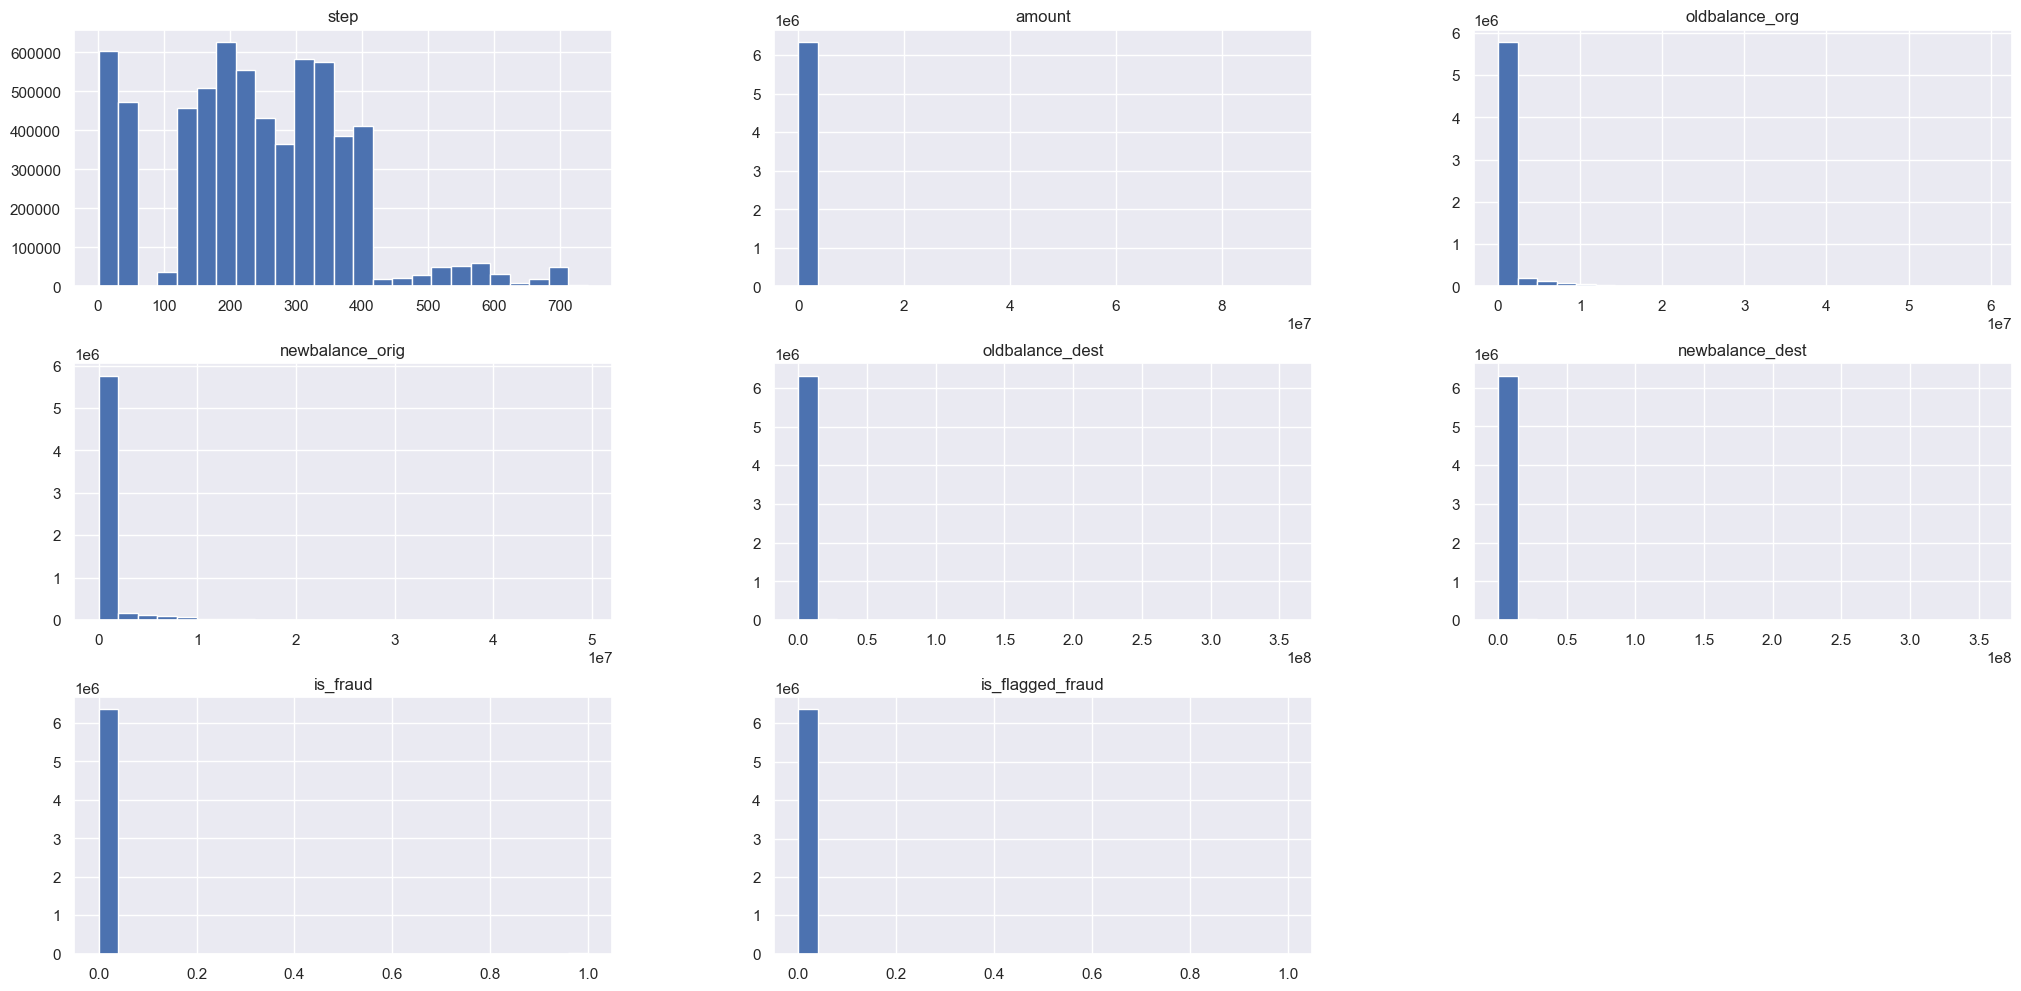

In [15]:
num_attributes.hist(bins=25)

### There are 6 million instances in the dataset. PySpark will be utilized to handle this large volume of data.

### New Data Description after initialize PySpark

In [16]:
# create Spark session
ss = SparkSession.builder \
    .master("local[*]") \
    .appName("fraud_detection") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

23/06/09 21:30:15 WARN Utils: Your hostname, Ubuntu resolves to a loopback address: 127.0.1.1; using 192.168.0.88 instead (on interface enp1s0)
23/06/09 21:30:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/09 21:30:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/06/09 21:30:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [17]:
# define data schema
fraud_data_schema = StructType([
    StructField('step',             ShortType(),  True),
    StructField('type',             StringType(), True),
    StructField('amount',           DoubleType(), True),
    StructField('nameOrig',         StringType(), True),
    StructField('oldbalanceOrg',    DoubleType(), True),
    StructField('newbalanceOrig',   DoubleType(), True),
    StructField('namedest',         StringType(), True),
    StructField('oldbalanceDest',   DoubleType(), True),
    StructField('newbalanceDest',   DoubleType(), True),
    StructField('isFraud',          ByteType(),   True),
    StructField('isFlaggedFraud',   ByteType(),   True),
    
])

# load data from .csv
df_fraud_spark = ss.read.csv( path = '/home/ehgeraldo/repos/Fraud_Detection/data/synth_composite.csv', schema = fraud_data_schema, header = True )

In [18]:
# Check new schema

df_fraud_spark.printSchema()

root
 |-- step: short (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- namedest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: byte (nullable = true)
 |-- isFlaggedFraud: byte (nullable = true)



In [19]:
# Display data

df_fraud_spark.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+-------+--------------+
|step|    type|            amount|     nameOrig|     oldbalanceOrg|    newbalanceOrig|     namedest|    oldbalanceDest|    newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+-------+--------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|      0|             0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|      0|             0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|      0|             0|
+----+--------+-------------

In [20]:
# Column names

[print( column ) for column in df_fraud_spark.columns]

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
namedest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


[None, None, None, None, None, None, None, None, None, None, None]

In [21]:
# change from camel case to snake case
snake_case = [ inflection.underscore( column ) for column in df_fraud_spark.columns ]
    
# assign snake case to dataframe column names
df_description = df_fraud_spark.toDF( * snake_case )

In [22]:
# rename columns to avoid types
df_fraud_spark = df_description.withColumnRenamed("oldbalance_org"  , "old_balance_orig")  \
                               .withColumnRenamed("newbalance_orig" , "new_balance_orig") \
                               .withColumnRenamed("oldbalance_dest" , "old_balance_dest") \
                               .withColumnRenamed("newbalance_dest" , "new_balance_dest") \
                               .withColumnRenamed("namedest"        , "name_dest")

In [23]:
# check up the column names after transformation

[print( column ) for column in df_fraud_spark.columns ]

step
type
amount
name_orig
old_balance_orig
new_balance_orig
name_dest
old_balance_dest
new_balance_dest
is_fraud
is_flagged_fraud


[None, None, None, None, None, None, None, None, None, None, None]

# Data Types

In [24]:
# check data types

df_fraud_spark.printSchema()

root
 |-- step: short (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- name_orig: string (nullable = true)
 |-- old_balance_orig: double (nullable = true)
 |-- new_balance_orig: double (nullable = true)
 |-- name_dest: string (nullable = true)
 |-- old_balance_dest: double (nullable = true)
 |-- new_balance_dest: double (nullable = true)
 |-- is_fraud: byte (nullable = true)
 |-- is_flagged_fraud: byte (nullable = true)



In [25]:
df_fraud_spark.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|       0|               0|
+----+----

In [26]:
# Check NAs

{Nas : df_fraud_spark.filter( df_fraud_spark[ Nas ].isNull() ).count() for Nas in df_fraud_spark.columns  }

{'step': 0,
 'type': 0,
 'amount': 0,
 'name_orig': 0,
 'old_balance_orig': 0,
 'new_balance_orig': 0,
 'name_dest': 0,
 'old_balance_dest': 0,
 'new_balance_dest': 0,
 'is_fraud': 0,
 'is_flagged_fraud': 0}

# Descriptive Statistics after PySpark

## Numerical Attributes

In [27]:
print(df_fraud_spark.columns)

['step', 'type', 'amount', 'name_orig', 'old_balance_orig', 'new_balance_orig', 'name_dest', 'old_balance_dest', 'new_balance_dest', 'is_fraud', 'is_flagged_fraud']


In [28]:
# statistics for numerical features

df_statistic = df_fraud_spark.select('step','amount','old_balance_orig','new_balance_orig','old_balance_dest','new_balance_dest','is_fraud','is_flagged_fraud')

df_statistic.describe().show()

23/06/09 21:30:56 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|summary|              step|             amount|  old_balance_orig|  new_balance_orig|    old_balance_dest|    new_balance_dest|            is_fraud|    is_flagged_fraud|
+-------+------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|  count|           6362620|            6362620|           6362620|           6362620|             6362620|             6362620|             6362620|             6362620|
|   mean| 239.0055508579799| 179855.54211249668| 833897.5850304218| 793085.3291809701|  1100707.7318166073|   1225001.549275357|0.001290820448180152|2.200351427556572...|
| stddev|141.65411279271686|  603868.6933722033|2888442.8498536996|2853683.3534313063|    3399178.04817288|  3674127.2159501687|0.035904796801604

## Categorical Attributes

In [29]:
# Distinct for the categorical attributes

df_fraud_spark.select('type').distinct().show()

+--------+
|    type|
+--------+
|TRANSFER|
| CASH_IN|
|CASH_OUT|
| PAYMENT|
|   DEBIT|
+--------+



# FEATURE ENGINEERING

### The criteria selected for the formulation of hypotheses are guided by the availability of data that enables their validation.

####  H1. In over 90% of fraudulent incidents, the final balance of the origin account is equal to zero.
#### H2. In more than 50% of fraudulent occurrences, the initial balance of the origin account is higher than 10,000.
#### H3. In more than 75% of fraudulent occurrences, the transaction value is higher than 20,000.
#### H4. The "Transfer" type of transaction represents more than 50% of all frauds.
#### H5. In more than 80% of fraudulent occurrences, the initial balance of the destination account is zero.
#### H6. There is no origin account with more than 10 frauds.
#### H7. There is at least one destination account with more than 20 frauds.


In [30]:
# create a restore point for the previous section dataframe

df_delta = df_fraud_spark.alias('df_delta')

In [31]:
df_delta.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|       0|               0|
+----+----

In [32]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('amount', [0.25, 0.5, 0.75], 0)

[13388.343856394078, 74868.82430737306, 208713.73193872024]

In [33]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('old_balance_orig', [0.25, 0.5, 0.75], 0)

[1.579491435825568, 14206.572649065609, 107311.36776893587]

In [34]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('new_balance_orig', [0.25, 0.5, 0.75], 0)

[0.0, 0.0, 49482.51858676244]

In [35]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('old_balance_dest', [0.25, 0.5, 0.75], 0)

[10.009451879823455, 132704.37509808305, 943039.0509307851]

### delta_balan_orig

In [36]:
# delta_balance represent the variation in destination balance,
# delta_balan_orig = ( (new_balance_dest) - (old_balance_dest) )


df_delta = df_delta.withColumn('delta_balan_orig',col('new_balance_dest') - col('old_balance_dest') )

# check feature
df_delta.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|  237230.9746430565|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|        

### delta_balan_dest

In [37]:
### delta_balan_dest

# delta_balance represent the variation in destination balance,
# delta_balan_dest = ( (new_balance_dest) - (old_balance_dest) )


df_delta = df_delta.withColumn('delta_balan_dest',col('new_balance_dest') - col('old_balance_dest') )

# check feature
df_delta.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|  237230.9746430

### orig_rate

In [38]:
# orig_rate represent the rate between new_balance_orig and old_balance_orig
# orig_rate = ( (new_balance_orig + 1) / (old_balance_orig + 1) )

# NOTE: We added 1 to avoid "division by zero" error !!!

df_delta = df_delta.withColumn('orig_rate', (col('new_balance_orig') + 1) / (col('old_balance_orig') + 1) )

# check feature
df_delta.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|           orig_rate|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725| 0.09317005361493823|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_158694

### dest_rate

In [39]:
# dest_rate represent the rate between new_balance_dest and old_balance_dest
# dest_rate =  ( (new_balance_dest + 1) / (old_balance_dest + 1) )

# NOTE: We added 1 to avoid "division by zero" error !!!

df_delta = df_delta.withColumn('dest_rate', (col('new_balance_dest') + 1) / (col('old_balance_dest') + 1) )

# check feature
df_delta.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|           orig_rate|         dest_rate|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725| 0.09317005361493823|1.1805239062803912|
| 394|CASH_OUT|23709